# Linear Regression From First Principles

## In this notebook we will derive the supervised learning algorith of linear regression from scratch using its mathematical principles

In [44]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Import and read the data

In [45]:
# import the data
data = pd.read_csv('Salary_Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [46]:
# set up the training set
X = data['YearsExperience'].values
y = data['Salary'].values

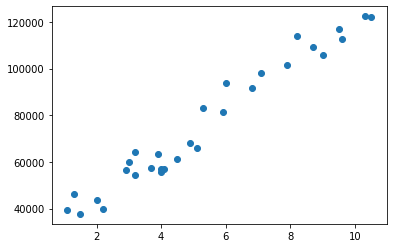

In [47]:
# plot the data
plt.scatter(X,y)

### Normalise the data using Z = (x - mu)/sigma to improve performance

In [48]:
# normalise the data
for i in range(len(X)):
    X[i] = (X[i] - np.mean(X)) / np.std(X)
    y[i] = (y[i] - np.mean(y)) / np.std(y)

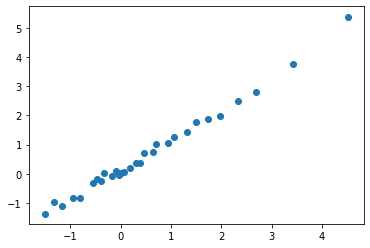

In [49]:
# replot the data
plt.scatter(X,y)

In [50]:
y = np.reshape(y, (30,1))
X = np.reshape(X,newshape=(-1,1))
X = np.hstack((np.ones((X.shape[0],1)), X))

In [51]:
theta = np.zeros((X.shape[1], 1))

In [52]:
print(theta)

[[0.]
 [0.]]


In [53]:
def h(x,theta):
    return np.matmul(x, theta)

In [54]:
def cost_function(x, y, theta):
	return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0])

In [55]:
def gradient_descent(x, y, theta, alpha, epochs):
    
    m = x.shape[0]
    costs = []
    
    for _ in range(epochs):
        h_x = h(x, theta)
        J = (1/m)*(x.T@(h_x - y))
        theta = theta - (alpha)*J
        costs.append(cost_function(x, y, theta))

    return theta, costs

In [56]:
# set parameters
alpha = 0.1
epochs = 20

In [57]:
J = cost_function(X, y, theta)

In [58]:
theta, costs = gradient_descent(X, y, theta, alpha, epochs)

In [59]:
n_e = []

for i in range(len(costs)):
    n_e.append(i)

In [60]:
J_all = []
for i in costs:
    J_all.append(i[0][0])

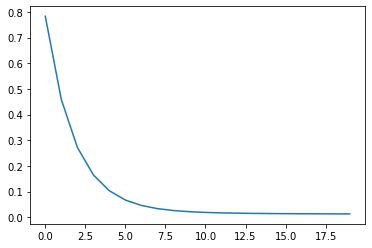

In [61]:

plt.plot(n_e,J_all)

In [62]:
print(theta)

[[0.18208671]
 [1.03711411]]


In [63]:
y_pred = np.matmul(X,theta)

In [64]:
y_pred.shape

(30, 1)

In [71]:
print(X[1:,])

[[ 1.00000000e+00 -1.32826862e+00]
 [ 1.00000000e+00 -1.17144650e+00]
 [ 1.00000000e+00 -9.39971253e-01]
 [ 1.00000000e+00 -8.14883312e-01]
 [ 1.00000000e+00 -5.57512991e-01]
 [ 1.00000000e+00 -4.79921456e-01]
 [ 1.00000000e+00 -3.81178737e-01]
 [ 1.00000000e+00 -3.40038140e-01]
 [ 1.00000000e+00 -1.74274962e-01]
 [ 1.00000000e+00 -8.83555371e-02]
 [ 1.00000000e+00 -2.95629233e-02]
 [ 1.00000000e+00  3.34301761e-03]
 [ 1.00000000e+00  5.87723420e-02]
 [ 1.00000000e+00  1.83594334e-01]
 [ 1.00000000e+00  3.08146844e-01]
 [ 1.00000000e+00  3.87362727e-01]
 [ 1.00000000e+00  4.67424110e-01]
 [ 1.00000000e+00  6.40540960e-01]
 [ 1.00000000e+00  7.05247741e-01]
 [ 1.00000000e+00  9.33875469e-01]
 [ 1.00000000e+00  1.06166410e+00]
 [ 1.00000000e+00  1.31936998e+00]
 [ 1.00000000e+00  1.48726460e+00]
 [ 1.00000000e+00  1.73176746e+00]
 [ 1.00000000e+00  1.97230829e+00]
 [ 1.00000000e+00  2.33123131e+00]
 [ 1.00000000e+00  2.68889010e+00]
 [ 1.00000000e+00  3.42381246e+00]
 [ 1.00000000e+00  4